<a target="_blank" href="https://colab.research.google.com/github/RanjeetKumbhar01/TE_IT_DSBDA_ASSIGNMENTS_SPPU/blob/main/Group_B/B_4/b_4_air.ipynb">
  <img align="left" alt="Goolge Colab"  src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
<br>

### Operations:
a. Data cleaning<br>
b. Data integration<br>
c. Data transformation<br>
d. Error correcting<br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/airquality_data.csv', encoding='latin-1')
# or 'ISO-8859-1' or any other encoding

<ipython-input-2-0d11b954fc00>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/airquality_data.csv', encoding='latin-1')


In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112623 entries, 0 to 112622
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     69557 non-null   object 
 1   sampling_date                112623 non-null  object 
 2   state                        112622 non-null  object 
 3   location                     112622 non-null  object 
 4   agency                       68025 non-null   object 
 5   type                         110994 non-null  object 
 6   so2                          101072 non-null  float64
 7   no2                          108409 non-null  float64
 8   rspm                         99485 non-null   float64
 9   spm                          60731 non-null   float64
 10  location_monitoring_station  103888 non-null  object 
 11  pm2_5                        4249 non-null    float64
 12  date                         112622 non-null  object 
dtyp

In [5]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

### Data Cleaning

In [6]:
# Change data type from float64 to float32 for Space Complexity
df['so2'] = df['so2'].astype('float32')
df['no2'] = df['no2'].astype('float32')
df['rspm'] = df['rspm'].astype('float32')
df['spm'] = df['spm'].astype('float32')
df['date'] = df['date'].astype('string')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112623 entries, 0 to 112622
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     69557 non-null   object 
 1   sampling_date                112623 non-null  object 
 2   state                        112622 non-null  object 
 3   location                     112622 non-null  object 
 4   agency                       68025 non-null   object 
 5   type                         110994 non-null  object 
 6   so2                          101072 non-null  float32
 7   no2                          108409 non-null  float32
 8   rspm                         99485 non-null   float32
 9   spm                          60731 non-null   float32
 10  location_monitoring_station  103888 non-null  object 
 11  pm2_5                        4249 non-null    float64
 12  date                         112622 non-null  string 
dtyp

In [7]:
df=df.drop_duplicates()

In [8]:
df.isna().sum()

,0
stn_code,43066
sampling_date,0
state,1
location,1
agency,44596
type,1617
so2,11550
no2,4214
rspm,13074
spm,51677


In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [10]:
percent_missing.sort_values(ascending=False)

,0
pm2_5,96.217631
spm,46.001763
agency,39.698407
stn_code,38.336434
rspm,11.638196
so2,10.281564
location_monitoring_station,7.717849
no2,3.751213
type,1.439419
state,0.000890


In [11]:
df=df.drop(['stn_code', 'agency','sampling_date','location_monitoring_station','pm2_5'], axis = 1)

In [12]:
df.head()

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,1990-03-01


In [13]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [14]:
col_var = ['state', 'location', 'type','date']
col_num = ['so2','no2','rspm','spm']

In [15]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [16]:
df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
date,0


In [17]:
df

,state,location,type,so2,no2,rspm,spm,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.800000,17.400000,100.12883,212.230484,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.100000,7.000000,100.12883,212.230484,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.200000,28.500000,100.12883,212.230484,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.300000,14.700000,100.12883,212.230484,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.700000,7.500000,100.12883,212.230484,1990-03-01
...,...,...,...,...,...,...,...,...
112618,Himachal Pradesh,Shimla,Residential and others,5.000000,6.400000,46.00000,94.000000,2008-06-12
112619,Himachal Pradesh,Shimla,Residential and others,2.400000,20.400000,47.00000,112.000000,2008-09-12
112620,Himachal Pradesh,Shimla,Residential and others,9.787808,22.597816,57.00000,98.000000,2008-11-12
112621,Himachal Pradesh,Shimla,Residential and others,9.787808,5.400000,66.00000,150.000000,2008-12-16


In [18]:
df.isna().sum()

,0
state,0
location,0
type,0
so2,0
no2,0
rspm,0
spm,0
date,0



# Data integration

In [19]:
subSet1 = df[['state', 'type']]
subSet2 = df[['state','location']]

In [20]:
subSet1.head()

,state,type
0,Andhra Pradesh,"Residential, Rural and other Areas"
1,Andhra Pradesh,Industrial Area
2,Andhra Pradesh,"Residential, Rural and other Areas"
3,Andhra Pradesh,"Residential, Rural and other Areas"
4,Andhra Pradesh,Industrial Area


In [21]:
subSet2.head()

,state,location
0,Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,Hyderabad
3,Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Hyderabad


In [22]:
concatenated_df = pd.concat([subSet1, subSet2], axis=1)

In [23]:
concatenated_df

,state,type,state,location
0,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
1,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
2,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
3,Andhra Pradesh,"Residential, Rural and other Areas",Andhra Pradesh,Hyderabad
4,Andhra Pradesh,Industrial Area,Andhra Pradesh,Hyderabad
...,...,...,...,...
112618,Himachal Pradesh,Residential and others,Himachal Pradesh,Shimla
112619,Himachal Pradesh,Residential and others,Himachal Pradesh,Shimla
112620,Himachal Pradesh,Residential and others,Himachal Pradesh,Shimla
112621,Himachal Pradesh,Residential and others,Himachal Pradesh,Shimla


### Error Correcting

In [24]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

In [25]:
df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'date'], dtype='object')

In [26]:
# Remove outliers for each column using a loop
col_name = ['so2', 'no2', 'rspm', 'spm']
for col in col_name:
    df[col] = remove_outliers(df[col])

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

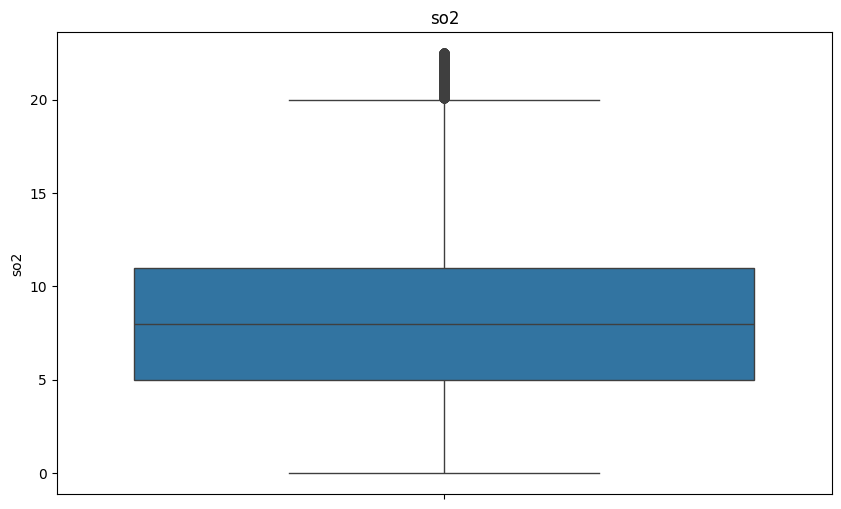

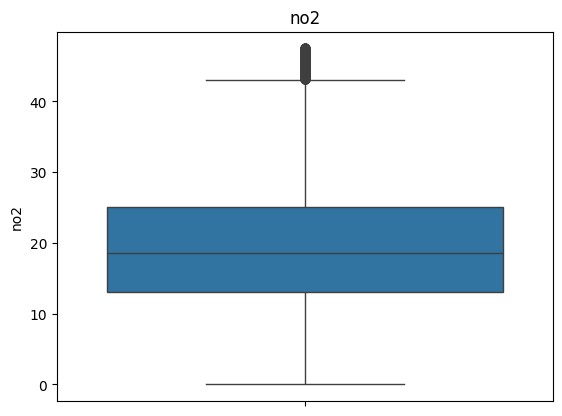

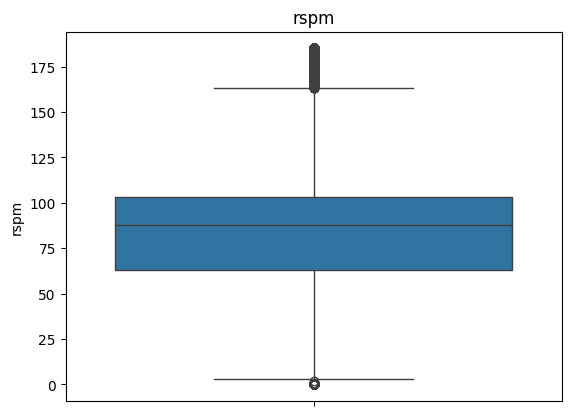

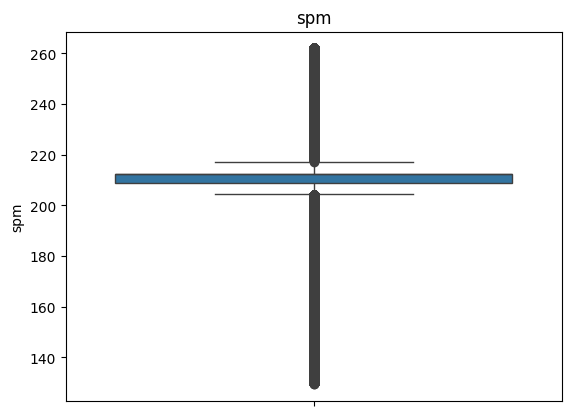

In [28]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

for col in col_name:
    sns.boxplot(data=df[col])
    plt.title(col)
    plt.show()

## Data Transform

In [29]:
from sklearn.preprocessing import LabelEncoder

col_label= ['state','location','type']
# Initialize LabelEncoder

encoder = LabelEncoder()
# Iterate over columns
for col in df.columns:
        # Fit and transform the column
        df[col] = encoder.fit_transform(df[col])

In [30]:
df

,state,location,type,so2,no2,rspm,spm,date
0,0,37,6,48,198,467,184,133
1,0,37,1,31,57,467,184,133
2,0,37,6,62,504,467,184,133
3,0,37,6,63,145,467,184,134
4,0,37,1,47,62,467,184,134
...,...,...,...,...,...,...,...,...
112618,12,80,5,50,51,97,306,2153
112619,12,80,5,24,273,101,306,2245
112620,12,80,5,118,332,145,306,2306
112621,12,80,5,118,41,189,39,2340
